In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Updated Label3.xlsx')

In [ ]:
df.head()

,Lemma,Label
0,Video show Nancy Pelosi say give shoot kill ...,True
1,George Soros ban Russia Pakistan Turkey Hung...,True
2,Scientists struggle understand Antarctica wa...,True
3,Symbols Huggies diaper cod reference pedophilia,True
4,video prove government acknowledge spray sky...,True


In [ ]:
df['Label'] = df['Label'].replace({ True:1,  False:0})

In [ ]:
df.shape

(109948, 2)

In [ ]:
df['Lemma'].isnull().sum()

412

In [ ]:
df2=df.dropna()

In [ ]:
df2['Lemma'].isnull().sum()

0

In [ ]:
df2['Label'].unique()

array([1, 0])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
x=df2['Lemma']
y=df2['Label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train_vec = vectorization.fit_transform(x_train)
x_test_vec = vectorization.transform(x_test)

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=5, min_samples_leaf=8, min_samples_split= 9)
dt.fit(x_train_vec,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=8,
                       min_samples_split=9)

In [ ]:
import joblib

In [ ]:
joblib.dump(dt, '/content/drive/MyDrive/DT.joblib')

['/content/drive/MyDrive/DT.joblib']

In [ ]:
from google.colab import files


files.download('/content/drive/MyDrive/DT.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dtpred=dt.predict(x_test_vec)

In [ ]:
dt.score(x_test_vec, y_test)

0.5946562794802349

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dtpred))

              precision    recall  f1-score   support

           0       0.58      0.49      0.53     15351
           1       0.61      0.68      0.64     17510

    accuracy                           0.59     32861
   macro avg       0.59      0.59      0.59     32861
weighted avg       0.59      0.59      0.59     32861



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_test,dtpred)

In [ ]:
labels = [['True Negative', 'False Positive'], ['False Negative', 'True Positive']]

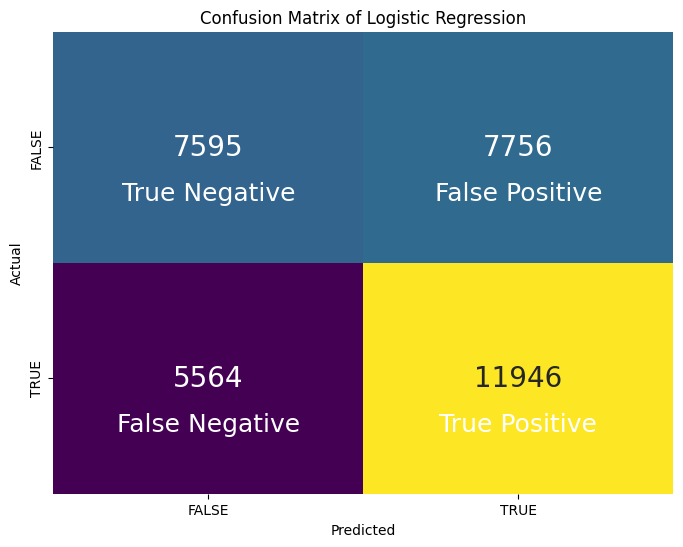

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="viridis", fmt="d", cbar=False,
            xticklabels=['FALSE', 'TRUE'],
            yticklabels=['FALSE', 'TRUE'],annot_kws={"size": 20})
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.7, labels[i][j], ha='center', va='center', fontsize=18, color='white')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Decision Tree')
plt.show()

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

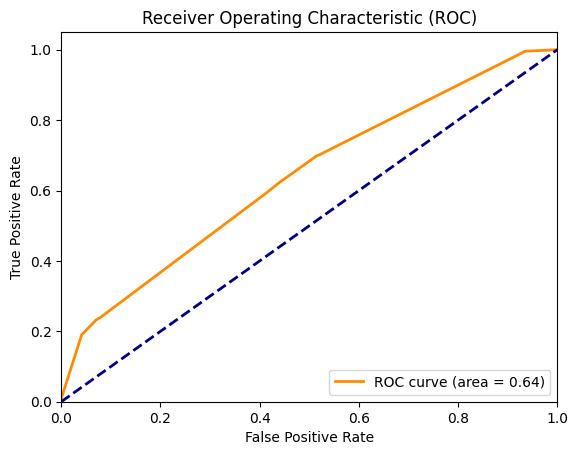

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


probas = dt.predict_proba(x_test_vec)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, probas)


roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


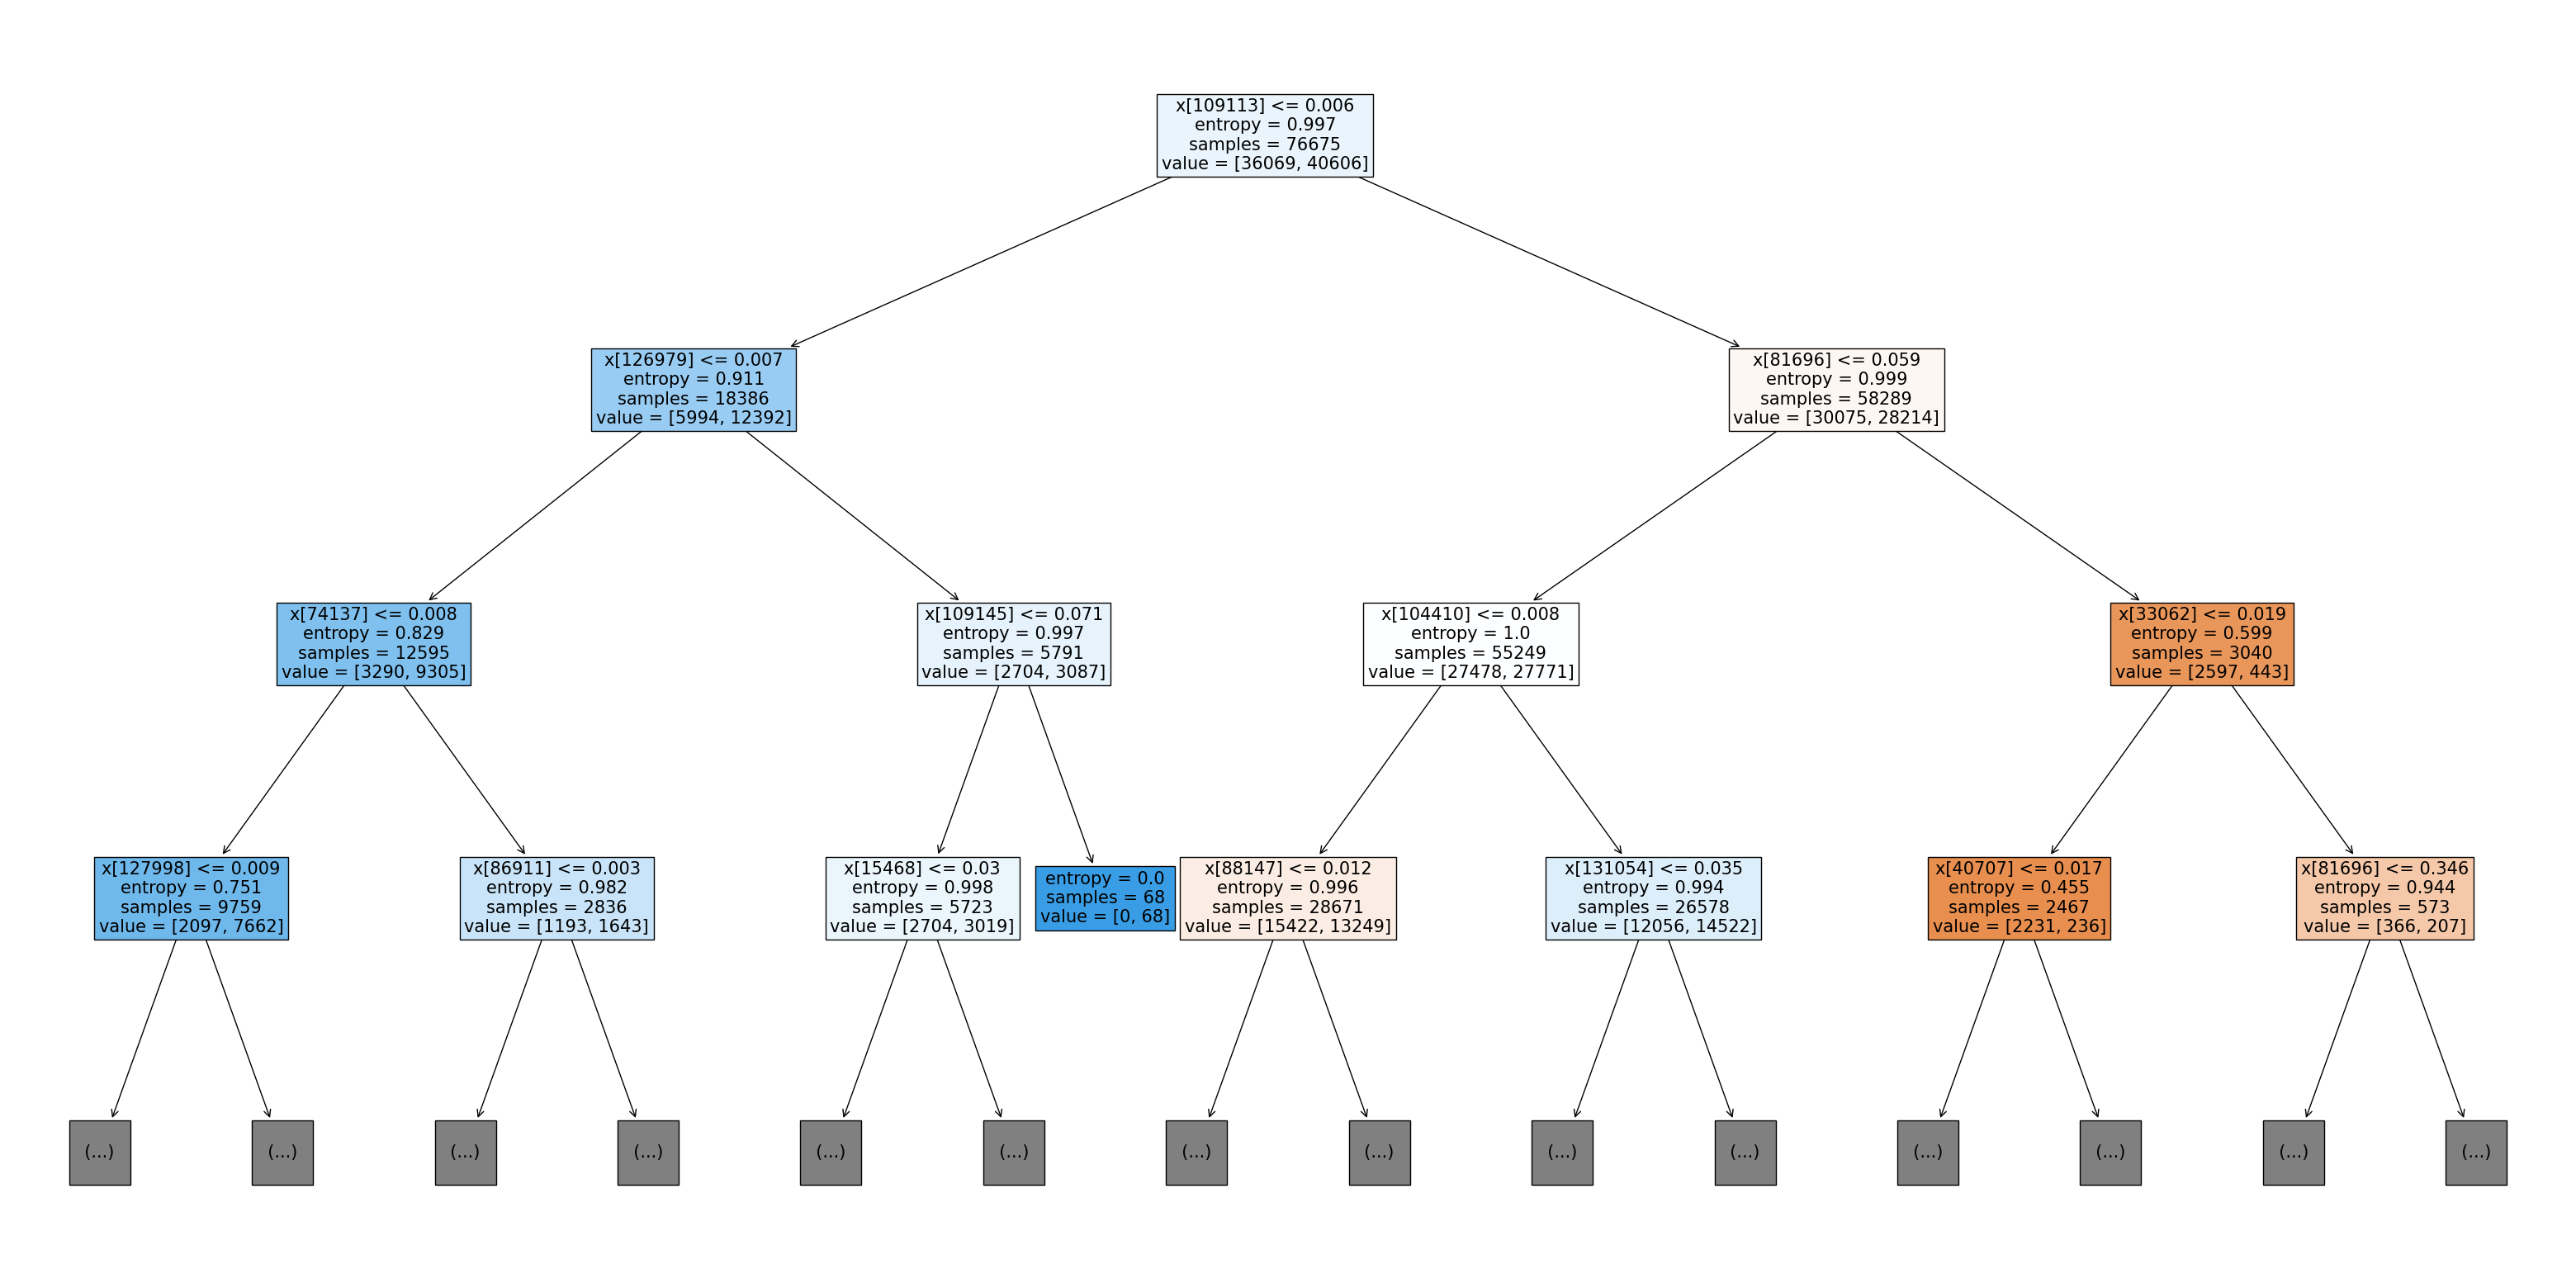

In [ ]:
plt.figure(figsize=(40,20))
plot_tree(dt,max_depth=3, filled=True, fontsize=15)
plt.show()

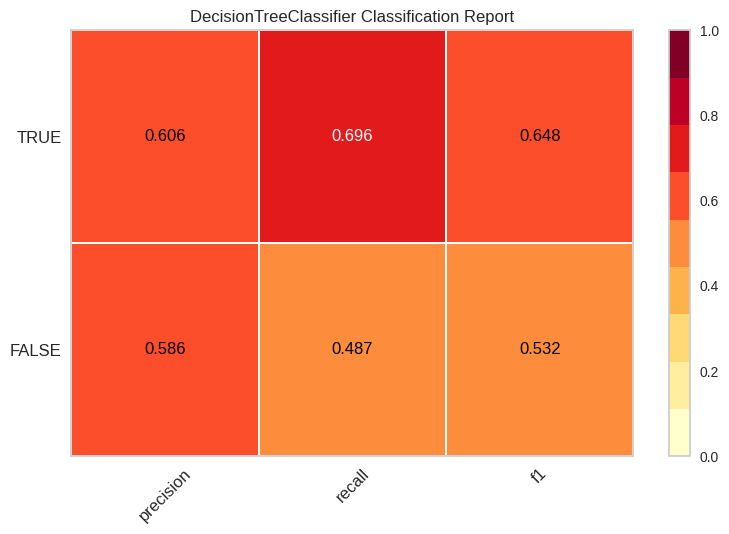

<Axes: title={'center': 'DecisionTreeClassifier Classification Report'}>

In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(dt, classes=['FALSE', 'TRUE'])
visualizer.fit(x_train_vec, y_train)
visualizer.score(x_test_vec, y_test)
visualizer.show()

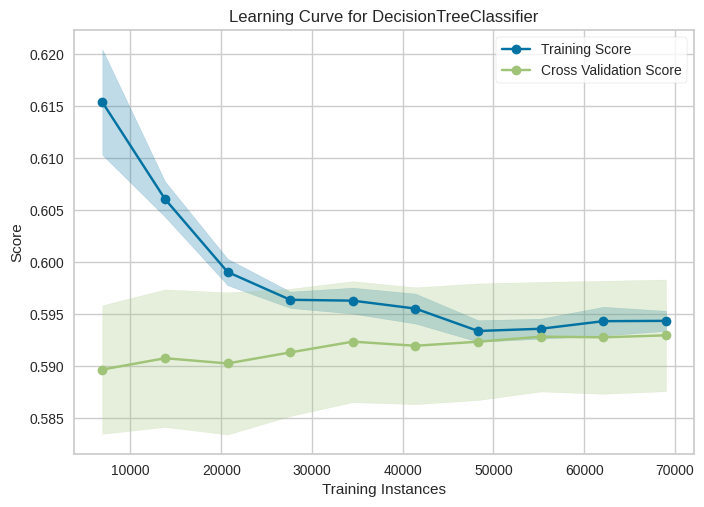

<Axes: title={'center': 'Learning Curve for DecisionTreeClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

lc_viz = LearningCurve(
    dt, cv=cv, scoring='f1_weighted', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

lc_viz.fit(x_train_vec, y_train)
lc_viz.show()